## Webinar 1

# Introduction to the classification task <br> <br>Task definition and data preparation

**Plan**

* [Theoretical part](#theory)
    * [Classification task](#classification)
    * [Quality metrics](#metrics)
* [Practical part](#practice)
    * [Task definition](#task)
    * [Data upload](#load_data)
    * [Type conversion](#cast)
    * [Data review](#review)    
    * [Gap processing](#gaps)
    * [Outliers handling](#outliers)
    * [Building new features](#new_features)
    * [Saving the training dataset](#saving)
    * [Model training](#training)
    * [Metrics calculation](#count_metrics)
* [Course project](#course_project)
    * [Task assignment](#course_project_task)
    * [Sample description of course project steps](#course_project_steps)
    * [Data review](#course_project_review) 

## <center>Theoretical part<a class="anchor" id="theory"></a><center>

### Classification task <a class="anchor" id="classification"></a>

There is a set of objects (situations) divided in some way into classes. For some objects from this set, their class affilition is known - this subset is called the training sample. The class membership of the remaining objects is unknown. Build an algorithm that can classify an arbitrary object from the initial set.

*Classify an object* - means to specify the number (or name of the class) to which the object belongs

*Classification of an object* is the number or name of the class given out by the classification algorithm as a result of its application to that particular object

**Binary classification**

The data are divided into two classes, and the model must be trained to determine whether an arbitrary object (from the set in question) belongs to one of them. The output of the algorithm should be either the label of one of the two classes, or the probabilities that the object in question belongs to each of them.

*An example of solving a binary classification problem using a linear model*

<img src="images/bin_class.png" width=500>

*An example of solving a binary classification problem using decision trees*

<img src="images/bin_class2.jpg">

**Multiclass classification**

The problem statement is similar to the binary classification problem, provided that the number of classes is greater than two.
The problem is usually solved with the same binary classifiers, but different approaches are used for their training and aggregation of predictions.

*One-vs-All approach*

N binary classifiers are trained, where N is the number of classes and N > 2, such that each of them learns to identify only one type of class from all the others. After that, the input object is evaluated by each of the classifiers and a decision is made to assign the object to one of the N classes based on which classifier showed more confidence that the object belongs to its class

*One-vs-One approach*

N*(N-1)/2 binary classifiers are trained, where N is the number of classes and N > 2, such that each of them learns to identify one type of class from another class. Each classifier predicts one class. The input object is evaluated by each of the classifiers and the class that turned out to be larger is output in response.

### Quality metrics <a class="anchor" id="metrics"></a>

*Example*

We have a sample of 13 animals, of which 8 are cats and 5 are other animals.

**Accuracy (proportion of correct answers)**

*Accuracy* - the proportion of correct answers reflects the percentage of objects for which classes have been defined correctly, among the whole set of objects

<center>$\large accuracy = \LARGE \frac{T}{N} = \frac{TP \: + \: TN}{TP \: + \: TN \: + \: FP \: + \: FN}$<center>

$T$ - number of objects for which classes have been defined correctly<br>
$N$ - total number of objects

**Problems with accuracy:**<br>
    
    1) Class imbalance
    
    cat - 950 observations
    pigeon - 50 observations
    a(x) = cat

    accuracy?

    2) Errors can have different costs

**Confusion matrix**

<img src="images/confusion_matrix.jpg">

Positive - the algorithm predicted that the object belongs to the "main" class.
* True Positive (TP) - the algorithm predicted that the object belongs to the "main" class and was right.
* False Positive (FP) - the algorithm predicted that the object belongs to the "main" class and was wrong.

Negative - the algorithm predicted that the object belongs to an "alternate" class.
* True Negative (TN) - the algorithm predicted that the object belongs to an "alternate" class and was right.
* False Negative (FN) - the algorithm predicted that the object belongs to an "alternate" class and was wrong.

Based on this notation, it turns out that the algorithm classified 8 animals correctly (5 cats and 3 other species), and it made a mistake in 5 cases (the algorithm didn't recognize 3 cats, and mistook 2 other species for cats).

_______________
<center><b>Question.</b> How many True Positive values in relation to the second class? </center>


________________

**Precision & Recall**

*Precision* reflects what percentage of the objects assigned to the "main" class are actually objects.

*Recall* is the algorithm's "main" class is the percentage of objects in the "main" class that are detected by the algorithm.

<center>$\large precision = \LARGE \frac{TP}{TP \: + \: FP} \:\:\:\:\: \large recall = \LARGE \frac{TP}{TP \: + \: FN}$<center>

<img src="images/prec_vs_recall.png">

_______________
<center><b>Question.</b> Calculate precision and recall metrics relative to the first class.</center>


_______________

**F-score (F-measure, harmonic average)**

*F-score* is a metric that combines accuracy and completeness and results in their harmonic mean, while $\beta$ allows you to balance the contribution made by accuracy, thereby focusing attention on the metric, maximizing which is our top priority.

The most common variation of this metric is F1-score,<br>If $\beta$ = 1 and the impact of precision and completeness are the same.<br>If $\beta$ > 1 - bias towards precision.<br>If 0 < $\beta$ < 1 - bias towards precision

<center>$\LARGE F_{\beta} = (1+ \beta^2) \cdot \frac{precision \: \cdot \: recall}{(\beta^2 \cdot precision) \: + \: recall}$<center>

Examples:
1. nuclear power plant, our / not our person - maximise precision
2. hospital, sick/healthy - maximise recall

______________
<center><b>Question.</b> How many false positives (FPs) are there relative to the first class? </center>


_______________

**PR-curve**

<img src="images/data.png" width=300px>
<img src="images/cutoff_05.jpg" height=300px>
<img src="images/cutoff_03.jpg" height=300px>
<img src="images/cutoff_08.jpg" height=300px>

The graphical characteristic of the quality of a binary classifier, shows the dependence of the algorithm's accuracy on its completeness.

<img src="images/pr-curve.png">

**ROC-curve + ROC-AUC**

The graphical characteristic of the binary classifier quality, shows the relationship between the proportion of true positive classifications *True Positive Rate (TPR)* and the proportion of false positive classifications *False Positive Rate (FPR)*.

<center>$\large TPR = \LARGE \frac{TP}{TP \: + \: FN} \:\:\:\:\: \large FPR = \LARGE \frac{FP}{FP \: + \: TN}$<center>

<img src="images/roc-curve.png">


_________________
### <center>PR-curve</center>
<img src="images/pr-curve-example.png" width=600px>

### <center>ROC-curve</center>
<img src="images/roc-curve-example.png" width=600px>

## <center>Practical part<a class="anchor" id="practice"></a><center>

- - - 

**Connecting libraries and scripts**

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                            accuracy_score, classification_report, plot_confusion_matrix, \
                            plot_precision_recall_curve, precision_recall_curve, recall_score, plot_roc_curve)

**Directory and file paths**

In [6]:
DATASET_PATH = './data/training_project/training_project_data.csv'
PREP_DATASET_PATH = './data/training_project/training_project_data_prep.csv'

### Task definition <a class="anchor" id="task"></a>

We are required as the bank to predict clients' credit card default in the next month, based on demographic data about the bank's customers, their payment history and account status.

**Data upload**

**Dataset description**

* **LIMIT_BAL** - Credit sum
* **SEX** - Sex (1 = male, 2 = female)
* **EDUCATION** - Education (1 = phd, 2 = university, 3 = high school, 4 = else, 5 = unknown, 6 = unknown)
* **MARRIAGE** - Status (1 = married, 2 = single, 3 = else)
* **AGE** - Age (in years)
* **PAY_1** - Repayment status in September (-1 = repayed completely, 0 = repayed partly, 1 = payment delay for 1 month, .., 3 = payment delay for 3+ months)
* **PAY_2** - Repayment status in August
* **PAY_3** - Repayment status in July
* **PAY_4** - Repayment status in June
* **PAY_5** - Repayment status in May
* **PAY_6** - Repayment status in April
* **BILL_AMT1** - Account statement amount in September
* **BILL_AMT2** - Account statement amount in August
* **BILL_AMT3** - Account statement amount in July
* **BILL_AMT4** - Account statement amount in June
* **BILL_AMT5** - Account statement amount in May
* **BILL_AMT6** - Account statement amount in April
* **PAY_AMT1** - Amount of previous payment in September
* **PAY_AMT2** - Amount of previous payment in August
* **PAY_AMT3** - Amount of previous payment in July
* **PAY_AMT4** - Amount of previous payment in June
* **PAY_AMT5** - Amount of previous payment in May
* **PAY_AMT6** - Amount of previous payment in April
* **NEXT_MONTH_DEFAULT** - Overdue payment the following month (1 = yes, 0 = no)

### Data Upload<a class="anchor" id="load_data"></a>

In [7]:
df = pd.read_csv(DATASET_PATH)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,2,2,2,24,1,2,0,0,0,...,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


In [8]:
df.shape

(10000, 24)

In [9]:
df.iloc[0]

LIMIT_BAL             150000.0
SEX                        2.0
EDUCATION                  2.0
MARRIAGE                   2.0
AGE                       24.0
PAY_1                      1.0
PAY_2                      2.0
PAY_3                      0.0
PAY_4                      0.0
PAY_5                      0.0
PAY_6                      0.0
BILL_AMT1              65542.0
BILL_AMT2              28311.0
BILL_AMT3              23978.0
BILL_AMT4              17853.0
BILL_AMT5              34527.0
BILL_AMT6              28277.0
PAY_AMT1                   0.0
PAY_AMT2                2145.0
PAY_AMT3               10000.0
PAY_AMT4               22000.0
PAY_AMT5                3000.0
PAY_AMT6                5093.0
NEXT_MONTH_DEFAULT         0.0
Name: 0, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           10000 non-null  float64
 1   SEX                 10000 non-null  int64  
 2   EDUCATION           10000 non-null  int64  
 3   MARRIAGE            10000 non-null  int64  
 4   AGE                 10000 non-null  int64  
 5   PAY_1               10000 non-null  int64  
 6   PAY_2               10000 non-null  int64  
 7   PAY_3               10000 non-null  int64  
 8   PAY_4               10000 non-null  int64  
 9   PAY_5               10000 non-null  int64  
 10  PAY_6               10000 non-null  int64  
 11  BILL_AMT1           10000 non-null  float64
 12  BILL_AMT2           10000 non-null  float64
 13  BILL_AMT3           10000 non-null  float64
 14  BILL_AMT4           10000 non-null  float64
 15  BILL_AMT5           10000 non-null  float64
 16  BILL_

### Type conversion <a class="anchor" id="cast"></a>

In [11]:
for colname in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[colname] = df[colname].astype(str)

In [12]:
df.dtypes

LIMIT_BAL             float64
SEX                    object
EDUCATION              object
MARRIAGE               object
AGE                     int64
PAY_1                  object
PAY_2                  object
PAY_3                  object
PAY_4                  object
PAY_5                  object
PAY_6                  object
BILL_AMT1             float64
BILL_AMT2             float64
BILL_AMT3             float64
BILL_AMT4             float64
BILL_AMT5             float64
BILL_AMT6             float64
PAY_AMT1              float64
PAY_AMT2              float64
PAY_AMT3              float64
PAY_AMT4              float64
PAY_AMT5              float64
PAY_AMT6              float64
NEXT_MONTH_DEFAULT      int64
dtype: object

### Data review<a class="anchor" id="review"></a>

**Target variable**

In [13]:
df['NEXT_MONTH_DEFAULT'].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

**Review of quantitative variables**

In [14]:
df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,168182.000000,35.39600,51490.560500,49298.972000,47292.40850,43605.665800,40347.829700,38996.784300,5511.82970,5.931217e+03,5385.050600,4585.585700,4712.134300,5055.019400,0.219500
std,130118.668771,9.19536,74906.094564,71808.952137,69398.13263,65062.788893,61044.676044,59682.999879,14748.85889,2.204220e+04,18527.041096,14066.147593,14080.847065,17359.210922,0.413929
min,10000.000000,21.00000,-11545.000000,-24704.000000,-157264.00000,-65167.000000,-23003.000000,-339603.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.00000,3388.000000,3016.500000,2561.75000,2400.000000,1703.250000,1300.750000,1000.00000,7.492500e+02,390.000000,277.250000,300.000000,150.750000,0.000000
50%,140000.000000,34.00000,22896.500000,21576.000000,20370.50000,19194.000000,18261.000000,17338.000000,2163.50000,2.001000e+03,1800.000000,1500.000000,1543.000000,1500.000000,0.000000
75%,240000.000000,41.00000,67834.750000,64243.500000,60783.25000,55731.250000,50491.000000,49696.000000,5001.00000,5.000000e+03,4651.500000,4014.250000,4100.000000,4000.000000,0.000000
max,1000000.000000,75.00000,964511.000000,983931.000000,689643.00000,891586.000000,927171.000000,961664.000000,493358.00000,1.227082e+06,896040.000000,432130.000000,417990.000000,422000.000000,1.000000


**Review of categorical variables**

* **SEX** - Sex (1 = male, 2 = female)
* **EDUCATION** - Education (1 = phd, 2 = university, 3 = high school, 4 = else, 5 = unknown, 6 = unknown)
* **MARRIAGE** - Status (1 = married, 2 = singles, 3 = else)

In [15]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

SEX

2    6068
1    3932
Name: SEX, dtype: int64
****************************************************************************************************

EDUCATION

2    4678
1    3496
3    1674
5      90
4      42
6      18
0       2
Name: EDUCATION, dtype: int64
****************************************************************************************************

MARRIAGE

2    5332
1    4547
3     108
0      13
Name: MARRIAGE, dtype: int64
****************************************************************************************************

PAY_1

0     4895
-1    2852
1     1217
2      881
3      155
Name: PAY_1, dtype: int64
****************************************************************************************************

PAY_2

0     5178
-1    3318
2     1318
3      175
1       11
Name: PAY_2, dtype: int64
****************************************************************************************************

PAY_3

0     5200
-1    3379
2     1288
3      131
1        2
Name: PAY_3, 

### Gap processing <a class="anchor" id="gaps"></a>

In [16]:
df.isna().sum()

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_1                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
NEXT_MONTH_DEFAULT    0
dtype: int64

### Outliers handling<a class="anchor" id="outliers"></a>

**Education**

In [17]:
df.loc[df['EDUCATION'] == '0', 'EDUCATION'] = df['EDUCATION'].mode()[0]

**Marriage**

In [18]:
df.loc[df['MARRIAGE'] == '0', 'MARRIAGE'] = df['MARRIAGE'].mode()[0]

### Building new features<a class="anchor" id="new_features"></a>

**Dummies**

In [19]:
df['IS_MALE'] = df['SEX'].map({'1':'1', '2':'0'}).astype(int)

In [20]:
for cat_colname in df.select_dtypes(include='object').columns[1:]:
    df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)

In [21]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


### Saving the training dataset <a class="anchor" id="saving"></a>

In [22]:
df.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

### Model training <a class="anchor" id="training"></a>

In [23]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'NEXT_MONTH_DEFAULT', 'IS_MALE', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_5_-1',
       'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3'],
      dtype='object')

In [24]:
X = df.drop(columns='NEXT_MONTH_DEFAULT')
y = df['NEXT_MONTH_DEFAULT']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2)
X_train.shape, X_test.shape

((8000, 60), (2000, 60))

In [26]:
%%time
tree = DecisionTreeClassifier(random_state=1)

param_grid=[{
             'max_depth': range(1, 15), 
             'min_samples_leaf': range(1, 10), 
            }]

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
tree = grid_search.best_estimator_

CPU times: user 48.5 s, sys: 1.03 s, total: 49.5 s
Wall time: 49.6 s


In [27]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1}

In [28]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

pred_proba_test = tree.predict_proba(X_test)
pred_proba_test[:5]

array([[0.89156047, 0.10843953],
       [0.89156047, 0.10843953],
       [0.89156047, 0.10843953],
       [0.89156047, 0.10843953],
       [0.79866332, 0.20133668]])

### Metrics calculation <a class="anchor" id="count_metrics"></a>

In [29]:
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)
print(f'Accuracy on train {accuracy_train}')
print(f'Accuracy on test {accuracy_test}')

Accuracy on train 0.827375
Accuracy on test 0.82


In [30]:
print(confusion_matrix(y_test, pred_test))

[[1503   84]
 [ 276  137]]


In [31]:
print(pd.crosstab(y_test, pred_test))

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   1503   84
1                    276  137


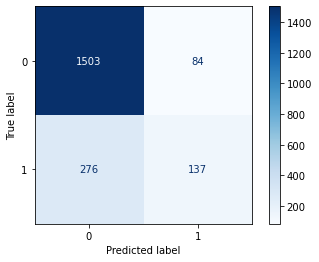

In [32]:
plot_confusion_matrix(tree, X_test, y_test, cmap = plt.cm.Blues);

In [33]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1587
           1       0.62      0.33      0.43       413

    accuracy                           0.82      2000
   macro avg       0.73      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000



__________
### Micro, Macro, Weighted

In [34]:
from sklearn.metrics import f1_score, precision_score, recall_score, \
                            classification_report, confusion_matrix, accuracy_score, f1_score

In [35]:
true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pred = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]

In [36]:
confusion_matrix(true, pred)

array([[4, 1],
       [5, 5]])

**Micro**

In [37]:
precision = 9 / 15
precision, accuracy_score(true, pred)

(0.6, 0.6)

In [38]:
recall = 9 / 15
recall, accuracy_score(true, pred)

(0.6, 0.6)

In [39]:
2 * (precision * recall) / (precision + recall)

0.6

In [40]:
f1_score(true, pred, average = 'micro')

0.6

**Macro**

In [41]:
precision_0 = 4 / (4 + 5)
precision_1 = 5 / (5 + 1)
macro_pr = (precision_1 + precision_0) / 2
macro_pr

0.6388888888888888

In [42]:
precision_score(true, pred, average = 'macro')

0.6388888888888888

In [43]:
recall_1 = 5 / (5 + 5)
recall_0 = 4 / (4 + 1)
macro_rec = (recall_1 + recall_0) / 2
macro_rec

0.65

In [44]:
recall_score(true, pred, average = 'macro')

0.65

In [45]:
# 1 option
f_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
f_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
f_score = (f_score_0 + f_score_1) / 2
f_score_0, f_score_1, f_score

(0.5714285714285714, 0.625, 0.5982142857142857)

In [46]:
# 2 option
2 * (macro_rec * macro_pr) / (macro_pr + macro_rec) 

0.6443965517241379

In [47]:
f1_score(true, pred, average = 'macro')

0.5982142857142857

**Weighted**

In [48]:
zero = true.count(0)
one = true.count(1)
size = len(true)

In [49]:
zero / size * precision_0 + one / size * precision_1

0.7037037037037037

In [50]:
precision_score(true, pred, average = 'weighted')

0.7037037037037038

In [51]:
zero / size * recall_0 + one / size * recall_1

0.6

In [52]:
recall_score(true, pred, average = 'weighted')

0.6

In [53]:
f_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
f_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
zero / size * f_score_0  + one / size * f_score_1

0.6071428571428571

In [54]:
f1_score(true, pred, average = 'weighted')

0.6071428571428572

_________

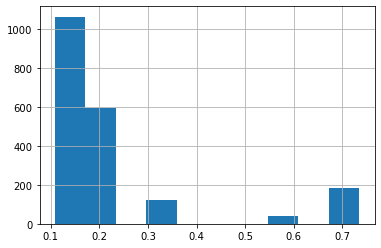

In [55]:
pd.Series(pred_proba_test[:,1]).hist();

In [56]:
pred_test = np.where(pred_proba_test[:,1] >= 0.3, 1, 0)

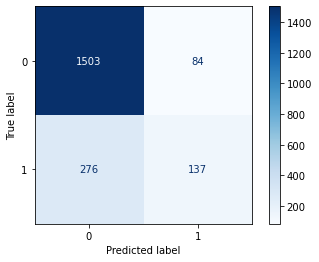

In [57]:
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues);

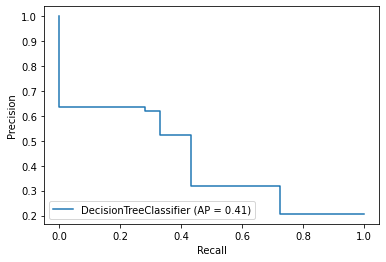

In [58]:
plot_precision_recall_curve(tree, X_test, y_test);

In [59]:
precision_recall_curve(y_test, pred_proba_test[:, 1])

(array([0.2065    , 0.31740977, 0.31702128, 0.31663113, 0.52339181,
        0.6199095 , 0.61971831, 0.63387978, 1.        ]),
 array([1.        , 0.72397094, 0.72154964, 0.71912833, 0.43341404,
        0.33171913, 0.31961259, 0.28087167, 0.        ]),
 array([0.10843953, 0.11764706, 0.14285714, 0.20133668, 0.34651163,
        0.56756757, 0.58522727, 0.73461538]))

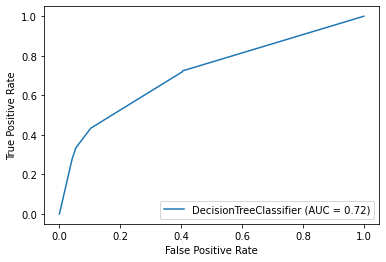

In [60]:
plot_roc_curve(tree, X_test, y_test);

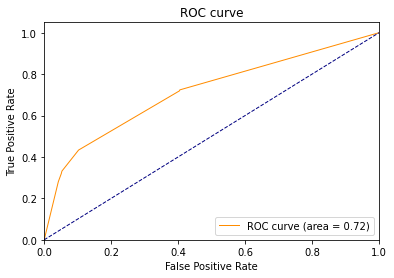

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',
         lw = 1, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 1, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = "lower right")
plt.show()

___

## <center>Course project<a class="anchor" id="course_project"></a><center>

### Task definition <a class="anchor" id="course_project_task"></a>

**Problem statement**

The bank needs to build a model using a training dataset to predict current loan defaults based on available customer data. Execute the prediction for the examples from the test dataset.

**Target variable**

Credit Default - the fact that the loan is in default

**Quality metrics**

F1-score (sklearn.metrics.f1_score)

**Goal**

*Target metrics*
* F1 > 0.5
* The metric is assessed on the quality of the forecast for the main class (1 - loan delinquency)

*Solution must contain*
1. Jupyter Notebook with your solution code
2. Enter your nickname on kaggle

*Recommendations for code file (ipynb)*
1. The file must contain headings and comments (markdown)
2. Repetitive operations are better to be in the form of functions
3. do not output a large number of table rows (5-10 is sufficient)
4. If possible add graphs describing data (about 3-5)
5. Add only the best model, i.e. don't include all variants of the project's solution in the code
6. The project script should work from start to finish (from data loading to prediction unloading)
7. The whole project should be in one script (ipynb file).
8. The use of Python libraries and machine learning models is allowed, that have been in this course.

*Submission*<br>
5 days after the last webinar

### An example of the steps involved in a course project <a class="anchor" id="course_project_steps"></a>

**Building a classification model**

1. Review of the training dataset
2. Outliers processing
3. Gap processing
4. Data analysis
5. Feature selection
6. Class balancing
7. Selection of models, obtaining bazelines
8. Selecting the best model, setting hyperparameters
9. Quality check, combating overtraining
10. Interpretation of results

**Prediction on a test dataset**

1. Perform the same processing and feature construction steps for the test dataset
2. Predict the target variable using the model built on the training dataset
3. Predictions shall be for all examples from the test dataset (for all rows)
4. Observe the original order of the examples from the test dataset

### Data review <a class="anchor" id="course_project_review"></a>

**Description of dataset**

* **Home Ownership** - home ownership
* **Annual Income** - Annual income
* **Years in current job** - Number of years in current job
* **Tax Liens** - Tax liens
* **Number of Open Accounts** - number of accounts opened
* **Years of Credit History** - Number of years of credit history
* **Maximum Open Credit** - Most Open Credit
* **Number of Credit Problems** - number of credit problems
* **Months since last delinquent** - number of months since last delinquency
* **Bankruptcies** - bankruptcies
* **Purpose** - purpose of the loan
* **Term** - term of loan
* **Current Loan Amount** - current loan amount
* **Current Credit Balance** - current credit balance
* **Monthly Debt** - monthly debt
* **Credit Default** - fact of loan default (0 - repaid on time, 1 - overdue)

**Directories and file paths**

In [63]:
TRAIN_DATASET_PATH = './data/course_project/train.csv'
TEST_DATASET_PATH = './data/course_project/test.csv'

**Data upload**

In [64]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [65]:
df_train.shape

(7500, 17)

In [66]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [67]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [68]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [69]:
df_test.shape

(2500, 16)